In [8]:
# Instala a biblioteca Ultralytics (YOLOv8)
!pip install ultralytics

In [9]:
# Importação e checagem

from ultralytics import YOLO
import os

print("Ultralytics YOLO carregado com sucesso.")

Ultralytics YOLO carregado com sucesso.


In [12]:
# Treinamento do Modelo

# Carrega o modelo YOLO base (você pode mudar para yolov8s.yaml ou yolov8m.yaml)
model = YOLO("yolov8n.yaml")

# Treinamento com seus dados
results = model.train(
    data="data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    name="detectar_arvores"  # Nome da pasta de saída
)


Ultralytics 8.3.163  Python-3.12.9 torch-2.7.1+cpu CPU (AMD Ryzen 5 5600 6-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=detectar_arvores3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 10.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access  (ping: 0.10.0 ms, read: 71.89.4 MB/s, size: 435.3 KB)


train: Scanning C:\Github\Projeto_2_IIA\labels\train... 219 images, 1 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 601.75it/s]

train: New cache created: C:\Github\Projeto_2_IIA\labels\train.cache



c:\Users\João Victor\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


val: Fast image access  (ping: 0.10.0 ms, read: 85.312.9 MB/s, size: 445.3 KB)


val: Scanning C:\Github\Projeto_2_IIA\labels\val... 154 images, 1 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 1022.02it/s]

val: New cache created: C:\Github\Projeto_2_IIA\labels\val.cache



c:\Users\João Victor\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\detectar_arvores3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\detectar_arvores3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      4.249      3.693      4.164        272        640: 100%|██████████| 14/14 [00:40<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.32s/it]

                   all        154       2299    0.00188     0.0378    0.00111   0.000398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      4.186      3.118      3.989        239        640: 100%|██████████| 14/14 [00:40<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<00:00,  3.61s/it]

                   all        154       2299     0.0019     0.0383    0.00116   0.000409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      3.574      2.402      3.656        285        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]

                   all        154       2299    0.00303     0.0609    0.00179   0.000656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      3.148      2.173      3.205        218        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.65s/it]

                   all        154       2299    0.00271     0.0544    0.00162   0.000552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      2.885      1.988      2.913        251        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<00:00,  3.71s/it]

                   all        154       2299     0.0158      0.318     0.0117    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      2.723      1.892      2.686        180        640: 100%|██████████| 14/14 [00:41<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]

                   all        154       2299    0.00508      0.102    0.00548    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      2.614       1.82      2.534        283        640: 100%|██████████| 14/14 [00:39<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

                   all        154       2299      0.218      0.104     0.0736     0.0231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/100         0G      2.524      1.836      2.426        178        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

                   all        154       2299       0.37     0.0805     0.0804     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      2.414      1.725      2.302        254        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]

                   all        154       2299      0.159       0.25      0.124     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      2.408       1.73      2.259        222        640: 100%|██████████| 14/14 [00:40<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]

                   all        154       2299      0.325      0.291      0.247     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      2.386      1.691      2.203        246        640: 100%|██████████| 14/14 [00:41<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.54s/it]

                   all        154       2299      0.447      0.332      0.317      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G      2.398      1.672      2.153        251        640: 100%|██████████| 14/14 [00:37<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]

                   all        154       2299      0.371      0.328      0.279      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      2.418      1.762      2.163        169        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]

                   all        154       2299      0.494      0.426      0.404      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G       2.34      1.699      2.115        184        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.67s/it]

                   all        154       2299      0.562      0.429      0.457      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     15/100         0G      2.301      1.638      2.077        238        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.60s/it]

                   all        154       2299      0.558       0.46      0.472      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      2.247      1.649      2.064        212        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.55s/it]

                   all        154       2299       0.56       0.44      0.478      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      2.218       1.59      1.995        276        640: 100%|██████████| 14/14 [00:40<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.63s/it]

                   all        154       2299      0.561      0.494      0.498      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      2.196      1.558      1.958        251        640: 100%|██████████| 14/14 [00:40<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.63s/it]

                   all        154       2299      0.552       0.47      0.481      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100         0G      2.177      1.551      1.918        263        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.65s/it]

                   all        154       2299      0.584      0.483      0.506      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      2.161      1.557      1.938        204        640: 100%|██████████| 14/14 [00:40<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.58s/it]

                   all        154       2299      0.502      0.467      0.457      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100         0G      2.177      1.577      1.955        238        640: 100%|██████████| 14/14 [00:40<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.61s/it]

                   all        154       2299      0.571      0.478      0.497      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      2.161      1.517       1.89        209        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.72s/it]

                   all        154       2299      0.585      0.493      0.511      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      2.137      1.557      1.925        229        640: 100%|██████████| 14/14 [00:40<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.54s/it]

                   all        154       2299      0.613      0.455      0.506      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      2.091      1.508      1.877        213        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]

                   all        154       2299      0.658      0.523       0.56      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      2.133      1.487      1.903        233        640: 100%|██████████| 14/14 [00:39<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.50s/it]

                   all        154       2299       0.58      0.497      0.507      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      2.066      1.487      1.856        181        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.58s/it]

                   all        154       2299      0.591      0.492      0.527      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      2.028       1.45      1.794        216        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.52s/it]

                   all        154       2299      0.539      0.488      0.489      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      2.033      1.451       1.81        209        640: 100%|██████████| 14/14 [00:40<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]

                   all        154       2299      0.557      0.503      0.508      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/100         0G      2.054      1.475      1.806        184        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]

                   all        154       2299       0.58      0.501      0.524      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      2.013      1.419      1.769        176        640: 100%|██████████| 14/14 [00:38<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]

                   all        154       2299      0.642      0.514      0.563      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.983      1.388       1.74        189        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

                   all        154       2299      0.663      0.517      0.584      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      2.054      1.442      1.794        218        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]

                   all        154       2299      0.645      0.518      0.568      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.998      1.417      1.752        232        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.653      0.514      0.579      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G      1.974      1.407      1.748        173        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.38s/it]

                   all        154       2299      0.655      0.538      0.587      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      2.006      1.386      1.742        192        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.31s/it]

                   all        154       2299      0.599      0.487      0.532      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G      1.958      1.363        1.7        216        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]

                   all        154       2299      0.688      0.543      0.612      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.965      1.403      1.719        249        640: 100%|██████████| 14/14 [00:38<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.45s/it]

                   all        154       2299      0.655      0.537       0.59      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.955      1.405      1.689        169        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.42s/it]

                   all        154       2299      0.654      0.511      0.571       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.929      1.353       1.68        189        640: 100%|██████████| 14/14 [00:39<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.36s/it]

                   all        154       2299      0.662      0.559      0.614      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     40/100         0G      1.924      1.381      1.703        163        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.40s/it]

                   all        154       2299      0.686       0.54      0.619      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.935      1.387      1.698        294        640: 100%|██████████| 14/14 [00:40<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.40s/it]

                   all        154       2299      0.668       0.47      0.556      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/100         0G      1.934       1.36      1.676        308        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]

                   all        154       2299      0.703      0.543      0.621      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.927      1.375      1.713        197        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.657      0.556       0.62      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.921      1.357      1.697        217        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.47s/it]

                   all        154       2299       0.64      0.511      0.572      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G      1.927       1.35      1.678        263        640: 100%|██████████| 14/14 [00:40<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.41s/it]

                   all        154       2299      0.686      0.542      0.616      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.878       1.38      1.674        260        640: 100%|██████████| 14/14 [00:41<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.52s/it]

                   all        154       2299      0.656      0.544      0.612      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/100         0G      1.941      1.351      1.686        254        640: 100%|██████████| 14/14 [00:42<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]

                   all        154       2299      0.614      0.541      0.572      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.902      1.334      1.673        224        640: 100%|██████████| 14/14 [00:45<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.53s/it]

                   all        154       2299      0.678      0.562      0.627      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.884      1.327      1.679        215        640: 100%|██████████| 14/14 [00:41<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.50s/it]

                   all        154       2299      0.654      0.528      0.598      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.863      1.286      1.635        329        640: 100%|██████████| 14/14 [00:41<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.55s/it]

                   all        154       2299      0.694      0.567       0.64      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.859       1.33       1.66        207        640: 100%|██████████| 14/14 [00:41<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]

                   all        154       2299      0.687      0.559      0.633      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.899       1.33       1.67        228        640: 100%|██████████| 14/14 [00:39<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.45s/it]

                   all        154       2299       0.68      0.558      0.627       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     53/100         0G      1.894      1.308      1.645        182        640: 100%|██████████| 14/14 [00:40<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.685      0.565      0.629       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G      1.884      1.306      1.635        252        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.39s/it]

                   all        154       2299      0.731      0.551      0.649      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.867      1.272      1.609        248        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.47s/it]

                   all        154       2299      0.676      0.554      0.622      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.833      1.266       1.61        270        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]

                   all        154       2299      0.711      0.567       0.65       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.826      1.272      1.601        256        640: 100%|██████████| 14/14 [00:39<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.41s/it]

                   all        154       2299      0.691      0.572      0.646      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.857      1.297      1.624        217        640: 100%|██████████| 14/14 [00:39<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.45s/it]

                   all        154       2299      0.691      0.576      0.643      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G       1.85      1.263        1.6        301        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.41s/it]

                   all        154       2299      0.694      0.575      0.644      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G       1.85      1.293       1.62        172        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.701      0.566      0.644      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.807      1.268      1.609        192        640: 100%|██████████| 14/14 [00:40<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.691      0.599      0.666      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.811      1.251      1.585        259        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

                   all        154       2299      0.711      0.575      0.662      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.853      1.251      1.608        212        640: 100%|██████████| 14/14 [00:45<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]

                   all        154       2299      0.681      0.575      0.645      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.834      1.272      1.613        199        640: 100%|██████████| 14/14 [00:38<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.40s/it]

                   all        154       2299      0.727      0.586      0.664      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      1.824      1.271      1.591        262        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

                   all        154       2299      0.695      0.589      0.656      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100         0G      1.803      1.229      1.576        216        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]

                   all        154       2299      0.716      0.591      0.674      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.805       1.23      1.586        202        640: 100%|██████████| 14/14 [00:38<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.32s/it]

                   all        154       2299      0.715      0.589      0.668      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/100         0G      1.804      1.257      1.598        166        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

                   all        154       2299      0.725      0.557      0.654      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.795      1.202      1.562        303        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]

                   all        154       2299      0.724      0.585      0.663      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      1.802      1.208      1.586        191        640: 100%|██████████| 14/14 [00:38<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.39s/it]

                   all        154       2299      0.722      0.596      0.678      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G        1.8      1.231      1.595        204        640: 100%|██████████| 14/14 [00:41<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.41s/it]

                   all        154       2299        0.7      0.573      0.652      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100         0G      1.789      1.244      1.593        176        640: 100%|██████████| 14/14 [00:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]

                   all        154       2299      0.708      0.596      0.671      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      1.797      1.246      1.601        202        640: 100%|██████████| 14/14 [00:41<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

                   all        154       2299      0.718      0.597      0.677       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.772      1.231      1.568        197        640: 100%|██████████| 14/14 [00:39<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]

                   all        154       2299      0.714      0.579      0.662      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      1.811      1.245      1.593        210        640: 100%|██████████| 14/14 [00:38<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]

                   all        154       2299      0.722      0.608      0.682       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      1.794      1.225      1.581        197        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]

                   all        154       2299      0.729      0.598      0.684      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      1.729      1.186      1.549        240        640: 100%|██████████| 14/14 [00:38<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]

                   all        154       2299      0.728      0.609      0.688      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      1.805      1.216      1.577        268        640: 100%|██████████| 14/14 [00:37<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]

                   all        154       2299      0.708      0.597      0.674      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.777        1.2      1.565        242        640: 100%|██████████| 14/14 [00:39<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]

                   all        154       2299      0.717      0.612      0.688      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      1.766      1.209       1.56        155        640: 100%|██████████| 14/14 [00:40<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]

                   all        154       2299      0.744      0.596      0.686      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      1.763      1.195      1.548        211        640: 100%|██████████| 14/14 [00:42<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.32s/it]

                   all        154       2299       0.71        0.6       0.67      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      1.766      1.208      1.558        231        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.31s/it]

                   all        154       2299      0.714      0.619      0.682      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      1.758      1.219      1.575        243        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.26s/it]

                   all        154       2299      0.724      0.632      0.703      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      1.753      1.204      1.576        221        640: 100%|██████████| 14/14 [00:38<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]

                   all        154       2299      0.726      0.612      0.694      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     85/100         0G      1.743      1.185      1.535        245        640: 100%|██████████| 14/14 [00:38<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]

                   all        154       2299      0.728      0.598      0.685      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      1.765      1.173      1.565        270        640: 100%|██████████| 14/14 [00:39<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]

                   all        154       2299       0.72      0.624      0.699       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100         0G       1.77      1.242      1.589        230        640: 100%|██████████| 14/14 [00:39<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]

                   all        154       2299      0.732      0.609      0.698       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      1.717       1.18      1.532        245        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.22s/it]

                   all        154       2299      0.727      0.602      0.688      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      1.748        1.2      1.558        241        640: 100%|██████████| 14/14 [00:38<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]

                   all        154       2299      0.727      0.618      0.699      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      1.725      1.168      1.541        249        640: 100%|██████████| 14/14 [00:39<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.22s/it]

                   all        154       2299       0.72      0.642      0.701      0.388
Closing dataloader mosaic



c:\Users\João Victor\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      1.679      1.242      1.529        141        640: 100%|██████████| 14/14 [00:37<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]

                   all        154       2299      0.762      0.627      0.711        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      1.648      1.202      1.523        122        640: 100%|██████████| 14/14 [00:37<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.38s/it]

                   all        154       2299      0.715      0.607      0.691       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G       1.64      1.194      1.516        136        640: 100%|██████████| 14/14 [00:37<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]

                   all        154       2299      0.717      0.611      0.695      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     94/100         0G      1.643      1.177      1.513        128        640: 100%|██████████| 14/14 [00:37<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.30s/it]

                   all        154       2299      0.742      0.616      0.698      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      1.663      1.168      1.532        152        640: 100%|██████████| 14/14 [00:38<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

                   all        154       2299      0.744       0.62      0.705      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      1.651      1.158      1.509        145        640: 100%|██████████| 14/14 [00:38<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

                   all        154       2299      0.729      0.629      0.709      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G       1.65       1.16        1.5        150        640: 100%|██████████| 14/14 [00:37<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]

                   all        154       2299       0.73      0.631      0.706      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      1.653      1.162      1.508        116        640: 100%|██████████| 14/14 [00:38<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]

                   all        154       2299      0.743      0.627      0.712      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      1.634      1.162        1.5        121        640: 100%|██████████| 14/14 [00:37<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]

                   all        154       2299      0.739      0.634      0.715      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G      1.626      1.143      1.493        148        640: 100%|██████████| 14/14 [00:37<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]

                   all        154       2299      0.752       0.63      0.717       0.41



100 epochs completed in 1.451 hours.
Optimizer stripped from runs\detect\detectar_arvores3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\detectar_arvores3\weights\best.pt, 6.3MB

Validating runs\detect\detectar_arvores3\weights\best.pt...
Ultralytics 8.3.163  Python-3.12.9 torch-2.7.1+cpu CPU (AMD Ryzen 5 5600 6-Core Processor)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


                   all        154       2299      0.754       0.63      0.717       0.41
Speed: 1.0ms preprocess, 46.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\detectar_arvores3


In [13]:
# Avaliação do Modelo (Validação)
# Avaliação no conjunto de teste
metrics = model.val()
metrics

Ultralytics 8.3.163  Python-3.12.9 torch-2.7.1+cpu CPU (AMD Ryzen 5 5600 6-Core Processor)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2043.7456.9 MB/s, size: 417.6 KB)


val: Scanning C:\Github\Projeto_2_IIA\labels\val.cache... 154 images, 1 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
c:\Users\João Victor\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        154       2299      0.754       0.63      0.717       0.41
Speed: 1.4ms preprocess, 40.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\detectar_arvores32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B120CF0D70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [19]:
# Salva as métricas principais num txt
with open("resultados.txt", "w", encoding="utf-8") as f:
    f.write("📊 MÉTRICAS DO MODELO YOLOv8\n")
    f.write("============================\n")
    f.write(f"mAP50: {metrics.box.map50:.4f}\n")
    f.write(f"mAP50-95: {metrics.box.map:.4f}\n")
    f.write(f"Precision (mp): {metrics.box.mp:.4f}\n") # valor, não função
    f.write(f"Recall (mr): {metrics.box.mr:.4f}\n")    # idem
    f.write(f"Velocidade de inferência (ms/imagem): {metrics.speed['inference']:.2f}\n")

print("✅ Resultados salvos no arquivo resultados.txt")

✅ Resultados salvos no arquivo resultados.txt


In [25]:
# Fazer predições com o modelo treinado

# Carrega o modelo treinado (best.pt)
from glob import glob

# Pega o mais novo best.pt na pasta runs/detect/
pesos = sorted(glob("runs/detect/*/weights/best.pt"), key=os.path.getmtime, reverse=True)
model = YOLO(pesos[0])
print("Usando modelo:", pesos[0])

# Faz predições nas imagens de teste
model.predict(
    source="images/test",
    save=True,
    conf=0.25  # Ajuste conforme necessário
)

Usando modelo: runs/detect\detectar_arvores3\weights\best.pt

image 1/144 c:\Github\Projeto_2_IIA\images\test\0.png: 640x640 11 arvores, 45.1ms
image 2/144 c:\Github\Projeto_2_IIA\images\test\1.png: 640x640 20 arvores, 39.5ms
image 3/144 c:\Github\Projeto_2_IIA\images\test\10.png: 640x640 9 arvores, 39.3ms
image 4/144 c:\Github\Projeto_2_IIA\images\test\100.png: 640x640 4 arvores, 40.1ms
image 5/144 c:\Github\Projeto_2_IIA\images\test\104.png: 640x640 11 arvores, 39.8ms
image 6/144 c:\Github\Projeto_2_IIA\images\test\106.png: 640x640 9 arvores, 38.8ms
image 7/144 c:\Github\Projeto_2_IIA\images\test\108.png: 640x640 14 arvores, 39.4ms
image 8/144 c:\Github\Projeto_2_IIA\images\test\109.png: 640x640 8 arvores, 38.7ms
image 9/144 c:\Github\Projeto_2_IIA\images\test\110.png: 640x640 20 arvores, 38.4ms
image 10/144 c:\Github\Projeto_2_IIA\images\test\112.png: 640x640 29 arvores, 40.2ms
image 11/144 c:\Github\Projeto_2_IIA\images\test\113.png: 640x640 21 arvores, 39.1ms
image 12/144 c:\Githu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'arvore'}
 obb: None
 orig_img: array([[[ 97, 108, 111],
         [ 94, 106, 109],
         [ 90, 102, 105],
         ...,
         [ 48,  47,  42],
         [ 54,  54,  46],
         [ 89,  89,  81]],
 
        [[ 91, 102, 105],
         [ 88, 100, 103],
         [ 96, 108, 111],
         ...,
         [ 47,  48,  43],
         [ 49,  50,  45],
         [ 74,  73,  68]],
 
        [[ 90, 101, 104],
         [ 89, 101, 104],
         [ 90, 102, 105],
         ...,
         [ 46,  46,  43],
         [ 47,  47,  44],
         [ 59,  59,  56]],
 
        ...,
 
        [[108, 133, 126],
         [ 99, 125, 116],
         [ 91, 118, 106],
         ...,
         [163, 174, 171],
         [151, 162, 159],
         [130, 141, 136]],
 
        [[ 95, 120, 113],
         [ 98, 124, 115],
         [100, 126, 117],
         ...,
         [130, 141

🧪 Caminho da imagem predita: runs\detect\predict2\0.jpg


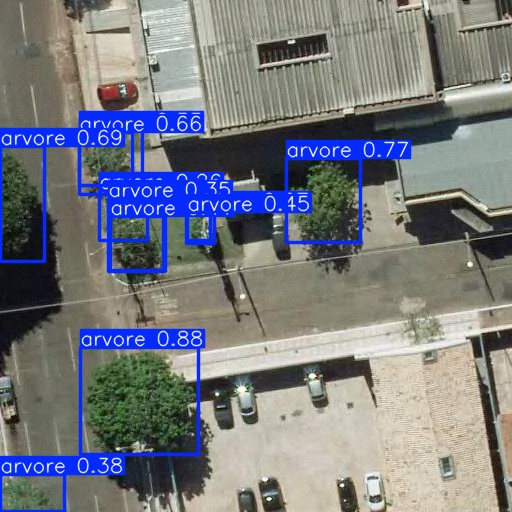

In [40]:
import cv2
import os
from glob import glob
from IPython.display import Image, display

# Encontra a última pasta de predição
pastas = sorted(glob("runs/**/predict*/"), key=os.path.getmtime, reverse=True)
predict_dir = pastas[0] if pastas else None

if predict_dir:
    imagens_preditas = [f for f in os.listdir(predict_dir) if f.endswith((".jpg", ".png"))]
    if imagens_preditas:
        img_path = os.path.join(predict_dir, imagens_preditas[0])
        print("🧪 Caminho da imagem predita:", img_path)
        
        # Exibição direta usando IPython
        display(Image(filename=img_path))
else:
    print("❌ Nenhuma pasta de predição encontrada.")

Label(value='Imagem 2 de 144: 1.jpg')

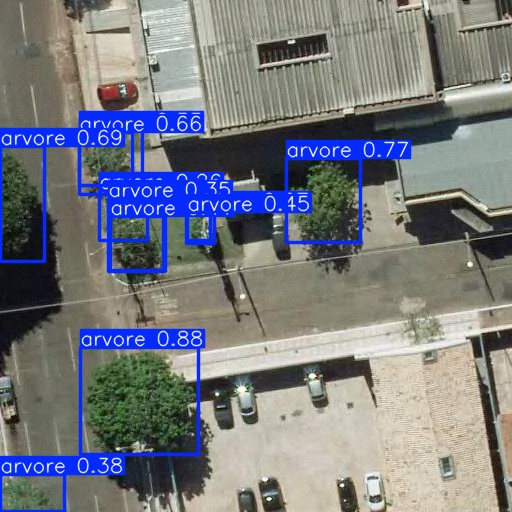

In [ ]:
# Mostra todos os resultados de uma só vez, sem sobrecarregar o notebook (foi o jeito que encontrei, tentei grade e não consegui)

import os
from glob import glob
from IPython.display import display, Image, clear_output
import ipywidgets as widgets

# Encontra a última pasta de predição
pastas = sorted(glob("runs/**/predict*/"), key=os.path.getmtime, reverse=True)
predict_dir = pastas[0] if pastas else None

if not predict_dir:
    print("❌ Nenhuma pasta de predição encontrada.")
    exit()

imagens_preditas = [f for f in os.listdir(predict_dir) if f.endswith((".jpg", ".png"))]
if not imagens_preditas:
    print("❌ Nenhuma imagem encontrada na pasta de predição.")
    exit()

# Widgets de controle
current_index = 0
total_imagens = len(imagens_preditas)

prev_button = widgets.Button(description="Anterior")
next_button = widgets.Button(description="Próxima")
index_label = widgets.Label()

def display_image(index):
    img_path = os.path.join(predict_dir, imagens_preditas[index])
    clear_output(wait=True)
    display(index_label, widgets.HBox([prev_button, next_button]))
    display(Image(filename=img_path, width=800))
    index_label.value = f"Imagem {index+1} de {total_imagens}: {imagens_preditas[index]}"

def on_prev_click(b):
    global current_index
    current_index = max(0, current_index - 1)
    display_image(current_index)

def on_next_click(b):
    global current_index
    current_index = min(total_imagens - 1, current_index + 1)
    display_image(current_index)

prev_button.on_click(on_prev_click)
next_button.on_click(on_next_click)

# Iniciar exibição
display_image(0)

In [43]:
# Apenas se quiser remover todos os resultados do treinamento feito

import shutil
import os

# Pergunta de confirmação para evitar exclusão acidental
confirm = input("⚠️ Tem certeza que deseja limpar TODOS os resultados? (sim/não): ").lower()

if confirm == 'sim' or confirm == 's':
    # Limpa o diretório de runs
    shutil.rmtree("runs", ignore_errors=True)
    print("🧹 Diretório 'runs' limpo.")
    
    # Limpa o arquivo de resultados
    resultados_path = "resultados.txt"
    if os.path.exists(resultados_path):
        os.remove(resultados_path)
        print("🧹 Arquivo 'resultados.txt' removido.")
    else:
        print("ℹ️ Arquivo 'resultados.txt' não encontrado.")
else:
    print("🚫 Operação de limpeza cancelada.")

🚫 Operação de limpeza cancelada.
